# Project - Neural Networks

In [1]:
# import all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils.vis_utils import plot_model


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix




/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

# Read the dataset

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
# Check dataset null values, descriptions and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


### Dataset has 10,000 samples and it looks like data is mostly clean ( i.e no Null  values, No NaN etc)

# Drop the columns which are unique for all users

In [7]:
# Drop the columns which are unique for all users
# Surname may be not unique but logically it has nothing to do with Exit
columns_to_drop = ["RowNumber", "CustomerId", "Surname"]
df.drop(columns_to_drop,axis=1,inplace=True)

### Even after dropping the columns, there are two colums that has non numeric value, 1) Geography 2) Gender. These two columns need to be converted via Labelencoder or OneHotEncode.

In [8]:
# convert gender to neumeric value
gender_coder = LabelEncoder()
df['Gender'] = gender_coder.fit_transform(df['Gender'])

In [9]:
# also Geography is string value, It is unique 3 values, so we can use one hot encoding for it
# now convert all categorical variable to numeric variable by using one hot encoding
df = pd.get_dummies(df, columns=["Geography"])

In [10]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


### Now , In dataframe , all columns are numeric and there is not string values

# Distinguish the feature and target set 

In [11]:
# Here target column will be "EXIT" and rest of the columns will be feature set
features = [col for col in df.columns if col != 'Exited']
features

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain']

# Divide the data set into training and test sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Exited'], test_size=.3, random_state=42)
X_train.shape, X_test.shape

((7000, 12), (3000, 12))

### Here above observation, data is splitted into training, test data by 70:30 ratio, with 7000 samples for training and 3000 samples for testing

# Normalize the train and test data

In [13]:
# data is not uniform. means it has wide min-max range, example balance has range 0-250K while HascrCard has only two value 0-1 
# Data need to Normalized, for this Standard scalar will be used
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform (X_test)

#  Initialize & build the model. Identify the points of improvement and implement the same

In [14]:
# Build Neural network by using some basic Dense layers with sequential connection and relu/sigmoid activation function

simple_model = Sequential(name="simple_model")
simple_model.add(Dense(32, activation = 'relu', input_shape = (X_train.shape[1],),name="Hidden1"))
simple_model.add(Dense(1, activation = 'sigmoid',name="Output"))
simple_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


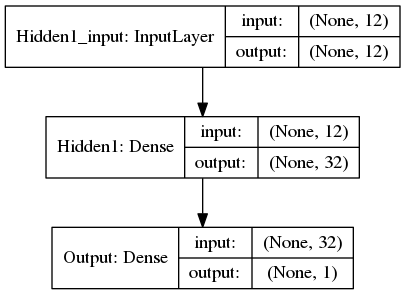

In [15]:
# Check model in graph
plot_model(simple_model, to_file='simple_model.png', show_shapes=True, show_layer_names=True)

In [16]:
simple_model.summary()

Model: "simple_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden1 (Dense)              (None, 32)                416       
_________________________________________________________________
Output (Dense)               (None, 1)                 33        
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Train And measure Accuracy of model, here batch size epoch are hyperparams, will adjust for performance
 train_history = simple_model.fit(X_train, y_train, batch_size=8, epochs=50, validation_split=0.2, verbose=1)

Train on 5600 samples, validate on 1400 samples
Epoch 1/50
5600/5600 [==============================] - 1s 161us/step - loss: 0.4824 - accuracy: 0.7748 - val_loss: 0.4140 - val_accuracy: 0.8186
Epoch 2/50
5600/5600 [==============================] - 1s 144us/step - loss: 0.4116 - accuracy: 0.8246 - val_loss: 0.3893 - val_accuracy: 0.8357
Epoch 3/50
5600/5600 [==============================] - 1s 140us/step - loss: 0.3861 - accuracy: 0.8395 - val_loss: 0.3752 - val_accuracy: 0.8421
Epoch 4/50
5600/5600 [==============================] - 1s 147us/step - loss: 0.3696 - accuracy: 0.8464 - val_loss: 0.3676 - val_accuracy: 0.8471
Epoch 5/50
5600/5600 [==============================] - 1s 143us/step - loss: 0.3602 - accuracy: 0.8525 - val_loss: 0.3586 - val_accuracy: 0.8529
Epoch 6/50
5600/5600 [==============================] - 1s 137us/step - loss: 0.3542 - accuracy: 0.8518 - val_loss: 0.3571 - val_accuracy: 0.8529
Epoch 7/50
5600/5600 [==============================] - 1s 146us/step - loss

In [18]:
# Define plot function to track validation and accuracy vs epoch
def plot_accuracy_loss_chart(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(accuracy) + 1)
    plt.plot(epochs, accuracy, 'bo', label='Training acc')
    plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

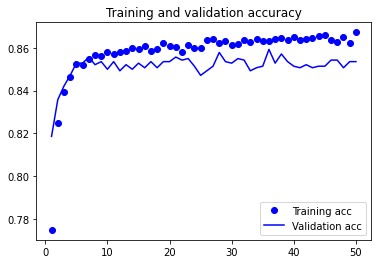

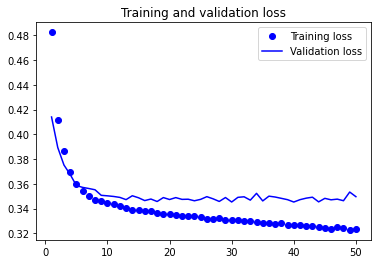

In [19]:
plot_accuracy_loss_chart(train_history)

## By looking at model performance, it is moderately performing Ok with only one hidden layer, accuracy and loss are constant with epoch.infact it is fluctuating which is not good sign. trying to add one more hidden layer for improvement.

In [20]:
# Adding one more layer to improve performance
dense_model = Sequential(name="dense_model")
dense_model.add(Dense(32, activation = 'relu', input_shape = (X_train.shape[1],),name="Hidden1"))
dense_model.add(Dense(32, activation = 'relu',name="Hidden2"))
dense_model.add(Dense(1, activation = 'sigmoid',name="Output"))
dense_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

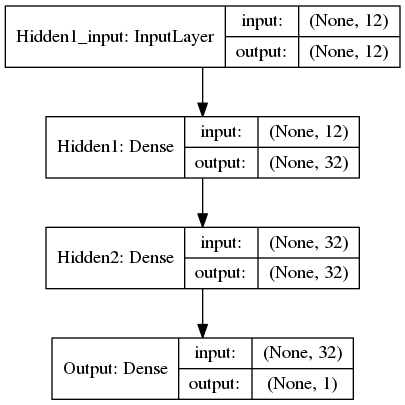

In [21]:
# Visualize model in diagram
plot_model(dense_model, to_file='dense_model.png', show_shapes=True, show_layer_names=True)

In [22]:
# Train And measure Accuracy of model
 train_history_dense = dense_model.fit(X_train, y_train, batch_size=8, epochs=50, validation_split=0.2, verbose=1)

Train on 5600 samples, validate on 1400 samples
Epoch 1/50
5600/5600 [==============================] - 1s 181us/step - loss: 0.4709 - accuracy: 0.7834 - val_loss: 0.4085 - val_accuracy: 0.8286
Epoch 2/50
5600/5600 [==============================] - 1s 155us/step - loss: 0.3911 - accuracy: 0.8386 - val_loss: 0.3719 - val_accuracy: 0.8579
Epoch 3/50
5600/5600 [==============================] - 1s 152us/step - loss: 0.3597 - accuracy: 0.8546 - val_loss: 0.3601 - val_accuracy: 0.8550
Epoch 4/50
5600/5600 [==============================] - 1s 152us/step - loss: 0.3495 - accuracy: 0.8509 - val_loss: 0.3564 - val_accuracy: 0.8543
Epoch 5/50
5600/5600 [==============================] - 1s 155us/step - loss: 0.3435 - accuracy: 0.8562 - val_loss: 0.3514 - val_accuracy: 0.8493
Epoch 6/50
5600/5600 [==============================] - 1s 161us/step - loss: 0.3395 - accuracy: 0.8589 - val_loss: 0.3532 - val_accuracy: 0.8507
Epoch 7/50
5600/5600 [==============================] - 1s 162us/step - loss

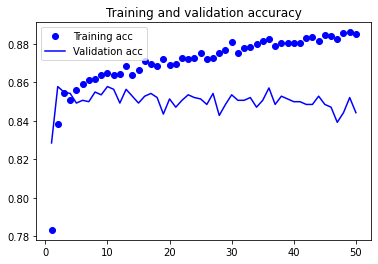

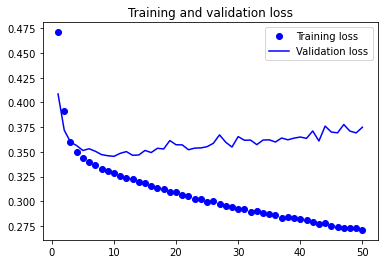

In [23]:
plot_accuracy_loss_chart(train_history_dense)

## By adding additional Dense layer, accuracy and validation accuracy both are improving.However after some epoch( n = 5) validation loss increased and training accuracy become constant. trying to add 30% dropout layer between dense hidden layers to improve performance.

In [24]:
# Adding dense layer with 30% drop out
dense_model_with_dropout = Sequential(name="dense_model")
dense_model_with_dropout.add(Dense(32, activation = 'relu', input_shape = (X_train.shape[1],),name="Hidden1"))
dense_model_with_dropout.add(Dropout(rate=0.3)) 
dense_model_with_dropout.add(Dense(32, activation = 'relu',name="Hidden2"))
dense_model_with_dropout.add(Dropout(rate=0.3))
dense_model_with_dropout.add(Dense(1, activation = 'sigmoid',name="Output"))
dense_model_with_dropout.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

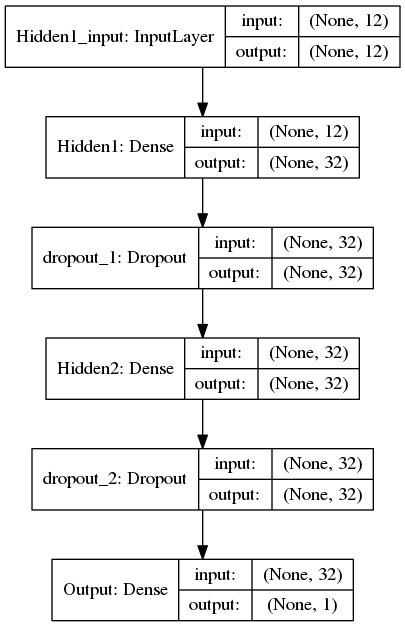

In [25]:
# Check model in graph
plot_model(dense_model_with_dropout, to_file='dense_model_with_dropout.png', show_shapes=True, show_layer_names=True)

In [26]:
#Train And measure Accuracy of model, here batch size epoch are hyperparams, will adjust for performance
train_history_dropout = dense_model_with_dropout.fit(X_train, y_train, batch_size=8, epochs=50, validation_split=0.2, verbose=1)

Train on 5600 samples, validate on 1400 samples
Epoch 1/50
5600/5600 [==============================] - 1s 207us/step - loss: 0.5046 - accuracy: 0.7771 - val_loss: 0.4244 - val_accuracy: 0.8093
Epoch 2/50
5600/5600 [==============================] - 1s 178us/step - loss: 0.4435 - accuracy: 0.8111 - val_loss: 0.4038 - val_accuracy: 0.8293
Epoch 3/50
5600/5600 [==============================] - 1s 166us/step - loss: 0.4287 - accuracy: 0.8204 - val_loss: 0.3853 - val_accuracy: 0.8429
Epoch 4/50
5600/5600 [==============================] - 1s 165us/step - loss: 0.4035 - accuracy: 0.8336 - val_loss: 0.3707 - val_accuracy: 0.8486
Epoch 5/50
5600/5600 [==============================] - 1s 164us/step - loss: 0.3961 - accuracy: 0.8314 - val_loss: 0.3690 - val_accuracy: 0.8457
Epoch 6/50
5600/5600 [==============================] - 1s 167us/step - loss: 0.3823 - accuracy: 0.8402 - val_loss: 0.3621 - val_accuracy: 0.8471
Epoch 7/50
5600/5600 [==============================] - 1s 168us/step - loss

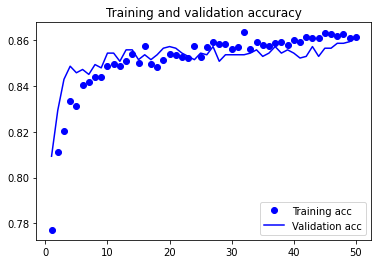

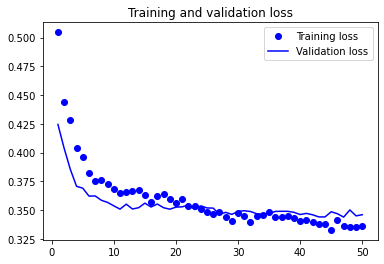

In [27]:
plot_accuracy_loss_chart(train_history_dropout)

## After adding dropout layer, both training accuracy and validation accuracy increased with epoch and both losses ( validation, training) decresed with epoch. this is the best imporved model so far. Use this for confusion matrix evalution

In [28]:
# Trying to improve model with other optimizer
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.1)
sgd =  tf.keras.optimizers.SGD(learning_rate=0.1)

In [29]:
#RmsProp
dense_model_with_dropout_rmsprop = Sequential(name="dense_model_rmsprop")
dense_model_with_dropout_rmsprop.add(Dense(32, activation = 'relu', input_shape = (X_train.shape[1],),name="Hidden1"))
dense_model_with_dropout_rmsprop.add(Dropout(rate=0.3)) 
dense_model_with_dropout_rmsprop.add(Dense(32, activation = 'relu',name="Hidden2"))
dense_model_with_dropout_rmsprop.add(Dropout(rate=0.3))
dense_model_with_dropout_rmsprop.add(Dense(1, activation = 'sigmoid',name="Output"))
dense_model_with_dropout_rmsprop.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])

In [30]:
train_history_dropout_rmsprop = dense_model_with_dropout_rmsprop.fit(X_train, y_train, batch_size=8, epochs=50, validation_split=0.2, verbose=1)

Train on 5600 samples, validate on 1400 samples
Epoch 1/50
5600/5600 [==============================] - 1s 188us/step - loss: 0.7373 - accuracy: 0.7709 - val_loss: 0.5386 - val_accuracy: 0.7943
Epoch 2/50
5600/5600 [==============================] - 1s 160us/step - loss: 0.6554 - accuracy: 0.7771 - val_loss: 0.5242 - val_accuracy: 0.7943
Epoch 3/50
5600/5600 [==============================] - 1s 162us/step - loss: 0.6777 - accuracy: 0.7818 - val_loss: 0.8161 - val_accuracy: 0.7914
Epoch 4/50
5600/5600 [==============================] - 1s 153us/step - loss: 0.6849 - accuracy: 0.7855 - val_loss: 0.5156 - val_accuracy: 0.7943
Epoch 5/50
5600/5600 [==============================] - 1s 155us/step - loss: 0.6696 - accuracy: 0.7873 - val_loss: 0.4985 - val_accuracy: 0.7943
Epoch 6/50
5600/5600 [==============================] - 1s 165us/step - loss: 0.7128 - accuracy: 0.7852 - val_loss: 0.5103 - val_accuracy: 0.7943
Epoch 7/50
5600/5600 [==============================] - 1s 160us/step - loss

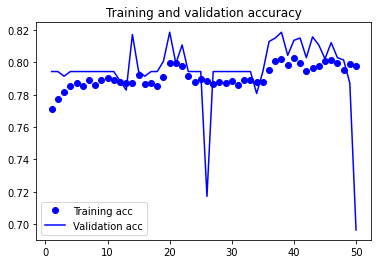

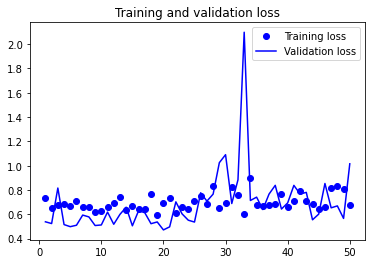

In [31]:
plot_accuracy_loss_chart(train_history_dropout_rmsprop)

### RMSprop optimizer is not giving accurate result. also it is flatulating.

In [32]:
#SGD
dense_model_with_dropout_sgd = Sequential(name="dense_model_sgd")
dense_model_with_dropout_sgd.add(Dense(32, activation = 'relu', input_shape = (X_train.shape[1],),name="Hidden1"))
dense_model_with_dropout_sgd.add(Dropout(rate=0.3)) 
dense_model_with_dropout_sgd.add(Dense(32, activation = 'relu',name="Hidden2"))
dense_model_with_dropout_sgd.add(Dropout(rate=0.3))
dense_model_with_dropout_sgd.add(Dense(1, activation = 'sigmoid',name="Output"))
dense_model_with_dropout_sgd.compile(optimizer=sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [33]:
train_history_dropout_sgd = dense_model_with_dropout_sgd.fit(X_train, y_train, batch_size=8, epochs=50, validation_split=0.2, verbose=1)

Train on 5600 samples, validate on 1400 samples
Epoch 1/50
5600/5600 [==============================] - 1s 162us/step - loss: 0.4740 - accuracy: 0.8009 - val_loss: 0.4113 - val_accuracy: 0.8221
Epoch 2/50
5600/5600 [==============================] - 1s 149us/step - loss: 0.4198 - accuracy: 0.8209 - val_loss: 0.3948 - val_accuracy: 0.8221
Epoch 3/50
5600/5600 [==============================] - 1s 147us/step - loss: 0.3977 - accuracy: 0.8321 - val_loss: 0.3658 - val_accuracy: 0.8471
Epoch 4/50
5600/5600 [==============================] - 1s 148us/step - loss: 0.3968 - accuracy: 0.8314 - val_loss: 0.3695 - val_accuracy: 0.8507
Epoch 5/50
5600/5600 [==============================] - 1s 150us/step - loss: 0.3845 - accuracy: 0.8402 - val_loss: 0.3689 - val_accuracy: 0.8379
Epoch 6/50
5600/5600 [==============================] - 1s 144us/step - loss: 0.3784 - accuracy: 0.8386 - val_loss: 0.3650 - val_accuracy: 0.8479
Epoch 7/50
5600/5600 [==============================] - 1s 146us/step - loss

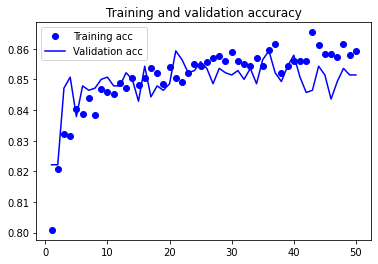

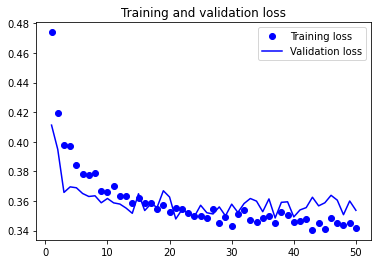

In [34]:
plot_accuracy_loss_chart(train_history_dropout_sgd)

### SGD is better than RMSProp but still Adam is the best optimizer.

## By observing above various experiments with neural network, Points of improvements are mentioned.

1) Add dense layer into neural network increased accurarcy, multiple hidden layers model (n=2) is performing better than n=1.however, higher number of  hidden layers will causing overfit if your data is not enough.

2) Adding Dropout significantly improve validation accuracy and validation loss which makes model more general.

3) Adam optimizer is working the best compare to other two (sgd and rmsprop).

4) final model gives ~89% accuracy which is moderatly good on relatively less data.


# Predict the results using 0.5 as a threshold

In [35]:
# Selecting dropout model with adam optimized and predicting result using thresold 0.5

# define threshold
threshold = 0.5

# predicting results
result = dense_model_with_dropout.predict(X_test)
result = (result > threshold).astype(int)
result

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

# Print the Accuracy score and confusion matrix 

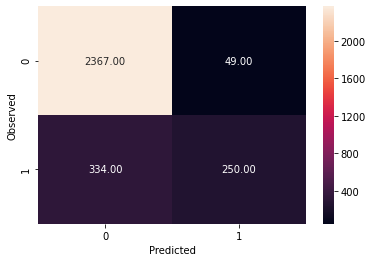

[[2367   49]
 [ 334  250]]


In [36]:
# Print confusion matrix for Neural network
cm = confusion_matrix(y_test, result)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

print(cm)

In [37]:
# Calculate Accuracy based on confusion matrix

accuray = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0])

print("Accuracy of Neural network is: {}".format(accuray))


Accuracy of Neural network is: 0.8723333333333333


In [38]:
# Calculate Recall
recall = (cm[1][1]/(cm[1][1]+cm[1][0]))
print("Recall of Neural network is: {}".format(recall))       

Recall of Neural network is: 0.4280821917808219


In [39]:
# Calculate Precision
precision = (cm[1][1]/(cm[1][1]+cm[0][1]))
print("Precision of Neural network is: {}".format(precision))  

Precision of Neural network is: 0.8361204013377926


### Conclusion: Neural network with dropout layer , multiple hidden layers(n=2)  with Adam optimizer give accuracy on training set around 89% and on test set 86-88% which is fairly good accuracy.